# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [9]:
def find_sum(a: int, d: int, N: int) -> float:
    result = 0
    for i in range(N):
        result += 1/(a + i * d)
    return result

a = 1
d = 1
N = 3
print(find_sum(a, d, N))

1.8333333333333333


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [14]:
def check_palindrome(N):
    old_num, new_num = N, 0
    while(N > 0):
        new_num *= 10
        new_num += N % 10
        N //= 10
    check_palindrome = (old_num == new_num)
    return check_palindrome

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [19]:
def find_palindromes(N):
    flag, count, i = False, 0, 44
    palindromes = []
    while(flag == False):
        if check_palindrome(i):
            palindromes.append(i)
            count += 1
            if count == N:
                flag = True
        i += 1
    return palindromes

print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [20]:
from random import randint

def find_median(a, b, c):
    result = 0
    if a <= b <= c or c <= b <= a:
        result = b
    elif b <= a <= c or c <= a <= b:
        result = a
    else:
        result = c
    return result

for i in range(10):

    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMedian:', find_median(a, b, c))

-71 97 63 	Median: 63
-68 -63 -63 	Median: -63
-94 59 -68 	Median: -68
33 -90 7 	Median: 7
98 85 80 	Median: 85
-84 -73 30 	Median: -73
16 -86 -18 	Median: -18
16 -86 -14 	Median: -14
51 -54 -36 	Median: -36
-32 14 -73 	Median: -32


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

In [112]:
my_array = np.random.normal(0, 1, 12)
my_array -= np.min(my_array)
my_array *= 15 / np.sum(my_array)

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 12
Sum of elements: 15.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [270]:
def calculate_manhattan(a, b):
    return np.sum(np.abs(a - b))

def calculate_euclidean(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

def calculate_chebyshev(a, b):
    distance = np.max(np.abs(a - b))
    return distance

def calculate_cosine(a, b):
    distance = 1 - (a.T.dot(b))/(np.sqrt(np.sum(np.square(a))) * np.sqrt(np.sum(np.square(b))))
    return distance

In [271]:
size = 5
a = np.random.randint(low=1, high=10, size=size)
b = np.random.randint(low=1, high=10, size=size)

print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 11
Euclidean distance: 8.06225774829855
Chebyshev distance: 7
Cosine distance: 0.12427227892797521


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [277]:
def transform(array):
    to_multiple = 16 / (np.max(array) - np.min(array))
    transformed_array = (array - np.min(array)) * to_multiple - 6
    return transformed_array

In [278]:
my_array = np.random.randint(low= -100, high = 100, size = 42)
my_array = transform(my_array)

print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -6.0
Max: 10.0
Array:
[-4.34196891  9.58549223 -4.09326425  2.87046632 -5.33678756 -3.01554404
 -3.92746114  7.51295337  5.77202073  9.00518135 10.         -5.17098446
 -2.76683938  4.3626943  -4.42487047 -3.76165803  7.51295337 -3.84455959
 -5.75129534  5.93782383  1.4611399   2.45595855 -1.44041451  1.95854922
  7.76165803 -0.19689119 -0.27979275  6.02072539  9.17098446  8.83937824
  2.95336788 -6.         -0.3626943  -3.51295337  0.46632124  8.25906736
 -4.09326425  4.69430052  1.87564767  1.12953368 -4.92227979  7.2642487 ]


**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [292]:
my_array = np.random.randint(low= -12, high = 4, size=(10, 3))
selected_column = my_array[:, np.argwhere(my_array == np.min(my_array))[0][1]]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (10, 3)
Array:
[[ -9 -10   3]
 [ -7  -2   3]
 [ -9  -6   3]
 [ -8   2   3]
 [-10  -9 -11]
 [-10  -7  -2]
 [ -4  -6  -9]
 [  1 -11  -6]
 [ -3 -12  -7]
 [ -9  -5 -12]]
Selected column: [-10  -2  -6   2  -9  -7  -6 -11 -12  -5]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [300]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[       nan 0.04546543 0.59012324        nan        nan 0.22348932
 0.31662515        nan 0.83001069 0.04915304]


In [303]:
def replace_missing(arr):
    array_without_missing = arr
    median = np.nanmedian(arr)  
    array_without_missing[np.isnan(arr)] = median
    return array_without_missing

In [304]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.27005724 0.04546543 0.59012324 0.27005724 0.27005724 0.22348932
 0.31662515 0.27005724 0.83001069 0.04915304]


**Answer:** I take a median value for the missing values, because it will save the distribution and will not interfere the analysis 

**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [206]:
def stats_channel(X):
    median = np.median(X, axis=(0, 1))
    std = np.std(X, axis=(0, 1))
    return median, std

In [207]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(stats_channel(X))

(array([-1., -3., -2.]), array([5.57772329, 5.47942116, 5.45902866]))


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [215]:
def get_unique_values(X):
    reshaped_X = X.reshape(X.shape[0], -1)
    result = np.unique(reshaped_X, axis=1)
    result = result.reshape(result.shape[0], *X.shape[1:])
    return result

In [216]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique :')
get_unique_values(X)

Matrix:
[[[4 5 5]
  [5 5 5]
  [5 5 5]]

 [[5 5 5]
  [4 5 4]
  [5 4 4]]

 [[5 4 5]
  [4 5 4]
  [5 5 4]]

 [[5 4 4]
  [5 4 4]
  [4 5 5]]

 [[4 5 4]
  [5 4 5]
  [4 4 5]]

 [[5 5 5]
  [4 4 5]
  [4 5 5]]

 [[4 5 4]
  [5 4 4]
  [5 5 4]]

 [[5 4 4]
  [4 5 5]
  [5 4 4]]

 [[5 4 4]
  [5 5 4]
  [4 4 5]]

 [[5 4 4]
  [4 5 4]
  [4 4 5]]

 [[4 5 4]
  [5 4 5]
  [5 5 4]]

 [[5 5 4]
  [5 5 4]
  [5 5 5]]

 [[4 5 4]
  [4 4 4]
  [5 4 5]]

 [[5 4 4]
  [4 5 5]
  [4 4 4]]

 [[5 5 5]
  [4 5 4]
  [5 5 4]]

 [[4 4 4]
  [5 5 4]
  [5 4 5]]

 [[4 5 4]
  [4 5 5]
  [4 5 5]]

 [[4 5 4]
  [4 4 5]
  [4 4 4]]

 [[5 5 5]
  [4 4 4]
  [4 4 4]]]
Unique :


array([[[4, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[5, 4, 4],
        [4, 4, 5],
        [5, 5, 5]],

       [[5, 4, 4],
        [4, 5, 4],
        [5, 5, 5]],

       [[5, 4, 5],
        [5, 5, 4],
        [4, 4, 4]],

       [[4, 5, 5],
        [5, 4, 5],
        [4, 4, 4]],

       [[5, 5, 4],
        [5, 5, 5],
        [4, 4, 5]],

       [[4, 4, 5],
        [4, 5, 5],
        [4, 5, 4]],

       [[5, 5, 4],
        [4, 4, 4],
        [5, 5, 4]],

       [[5, 4, 5],
        [5, 4, 4],
        [5, 4, 4]],

       [[5, 4, 4],
        [5, 4, 4],
        [5, 4, 4]],

       [[4, 5, 5],
        [4, 5, 5],
        [4, 5, 4]],

       [[5, 4, 5],
        [5, 5, 5],
        [5, 5, 4]],

       [[4, 4, 4],
        [5, 4, 5],
        [4, 5, 4]],

       [[5, 5, 4],
        [4, 4, 4],
        [5, 4, 4]],

       [[5, 4, 4],
        [4, 5, 5],
        [5, 5, 5]],

       [[4, 4, 5],
        [5, 4, 4],
        [5, 5, 4]],

       [[4, 5, 4],
        [5, 5, 5],
        [5, 4, 4]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [252]:
dataset =  pd.read_csv('titanic.csv')
dataset.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

In [356]:
# 1. We can see 177 missing values in column 'Age', 2 missing values in column 'Embarked' and 687 ones in 'Cabin'
print('1)')
dataset.isna().sum()

1)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [376]:
# 2. Percentage of survived passengers is about 38, classes are not very balanced
print('2)')
dataset['Survived'].value_counts(normalize=True).apply(lambda x: x * 100)
dataset[dataset['Survived'] == 1]['Pclass'].value_counts()

2)


Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [352]:
# 3. There are more males
print('3)')
dataset['Sex'].value_counts()

3)


Sex
male      577
female    314
Name: count, dtype: int64

In [353]:
# 4. The least popular port of embarkation is Queenstown
print('4)')
dataset['Embarked'].value_counts()

4)


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [354]:
# 5. There are three Passenger classes on Titanic
print('5)')
dataset['Pclass'].value_counts()

5)


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [355]:
# 6. The overall average ticket fare is about 32, for 1 class - 84.154687, for 2 class - 20.662183 and for 3 - 13.675550
print('6)')
dataset['Fare'].agg('mean')
dataset.groupby('Pclass')['Fare'].agg('mean')

6)


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

In [388]:
# Minimal age is 0.42 and maximum is 80
dataset['Age'].agg(['min', 'max'])

min     0.42
max    80.00
Name: Age, dtype: float64

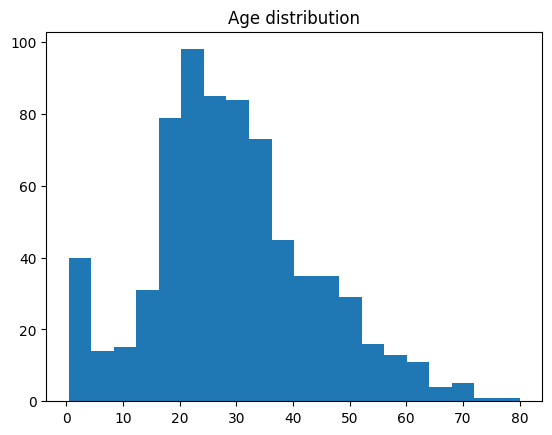

In [385]:
plt.hist(dataset['Age'], bins=20)
plt.title("Age distribution")
plt.show()

In [389]:
# Median age is 28, for males is 29 and for females - 27
dataset['Age'].agg('median')
dataset[dataset['Sex'] == 'male']['Age'].agg('median')
dataset[dataset['Sex'] == 'female']['Age'].agg('median')

27.0

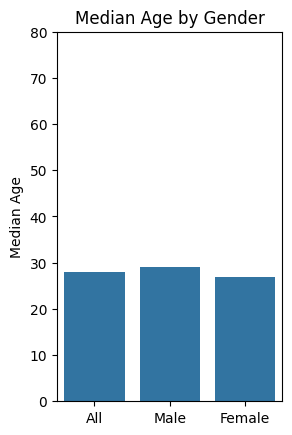

In [392]:
plt.subplot(1, 2, 2)
male_median = dataset[dataset['Sex'] == 'male']['Age'].median()
female_median = dataset[dataset['Sex'] == 'female']['Age'].median()
median = dataset['Age'].median()

sns.barplot(x=['All', 'Male', 'Female'], y=[median, male_median, female_median])
plt.title('Median Age by Gender')
plt.ylabel('Median Age')
plt.ylim(0, 80)

plt.show()

In [ ]:
# Conclusion: we can see that median value is deviated to the left, 
# ~21-22 are the most frequency values, 
# the distribution is not very similar to normal

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

In [397]:
titles = dataset['Name'].apply(lambda x: x.split(', ')[1].split()[0])
titles

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Name, Length: 891, dtype: object

In [394]:
# 1. There are 17 unique titles
titles.unique().shape[0]

(17,)

In [396]:
# 2. 
titles.value_counts()
# 3. The most popular man's title is Mr., and for womans's - Miss.

Name
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



In [341]:
# The correlation between pclass and ticket price is -0.55
dataset['Pclass'].corr(dataset['Fare'])

-0.5494996199439082

In [342]:
# The mean price for each class
dataset.groupby('Pclass')['Fare'].agg('mean')

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

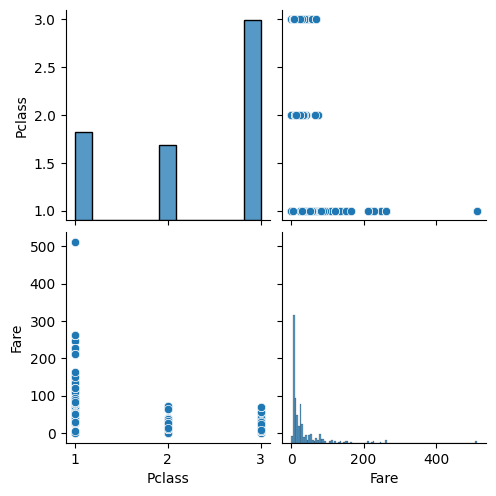

In [343]:
# Pairplot
sns.pairplot(data=dataset[['Pclass', 'Fare']])

<Axes: xlabel='Pclass', ylabel='Fare'>

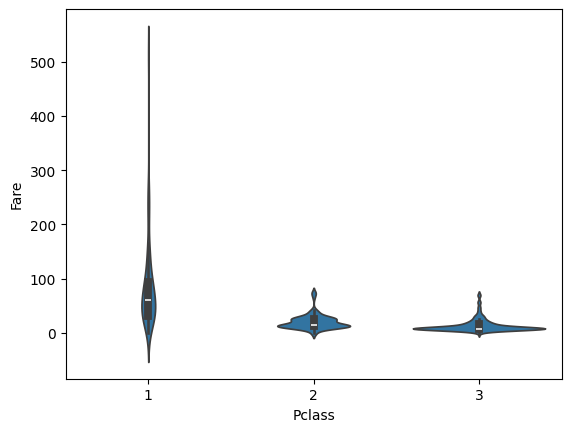

In [411]:
# Violin plot
sns.violinplot(data=dataset, x="Pclass", y="Fare")

We can see a big outlier in the first class, it seems to be one royal ticket in Titanic...

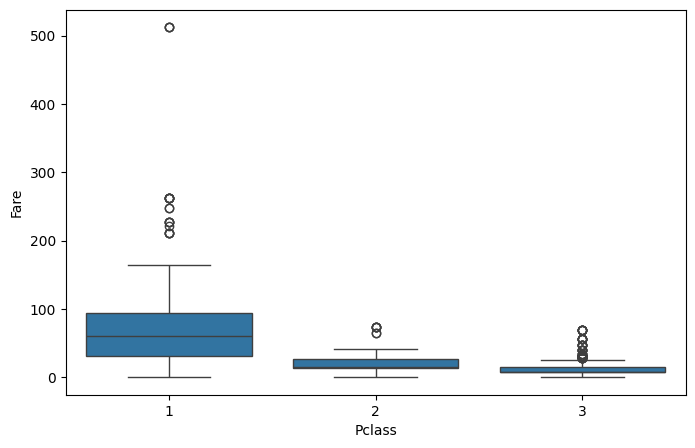

In [414]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset, x='Pclass', y='Fare')

plt.show()

**Answer** - We can see that the correlation between the parameters 'Pclass' and 'Fare' is almost -0.55, this tells us about a weak inverse relationship. On the boxplot we can see a big amount of outliers in first and third classes, that can be reasons of this relationship. We need to delete this outliers before building the model and also check other correlations with other parameters, it will really improve the model.

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [410]:
def inverse(x):
    if x == 'C':
        return 1
    elif x == 'Q':
        return 2
    elif x == 'S':
        return 3

# New column for calculating the correlation
new_embarked = dataset['Embarked'].apply(inverse)
dataset['Fare'].corr(new_embarked)

-0.22631118369626857

In [416]:
# The mean price for each class
dataset.groupby('Embarked')['Fare'].agg('mean')

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

Text(0, 0.5, 'Ticket Price')

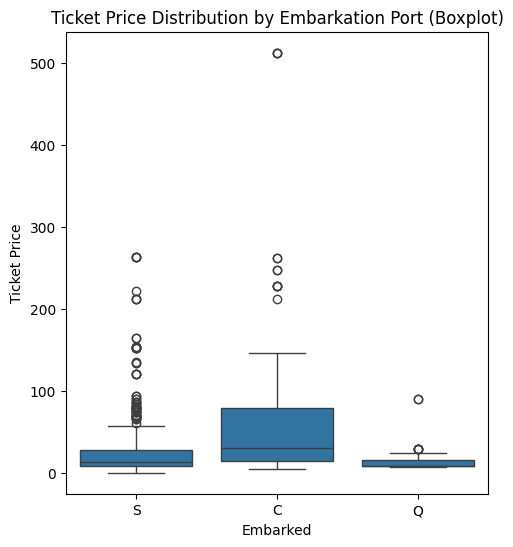

In [433]:
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset, x='Embarked', y='Fare')
plt.title('Ticket Price Distribution by Embarkation Port (Boxplot)')
plt.xlabel('Embarked')
plt.ylabel('Ticket Price')

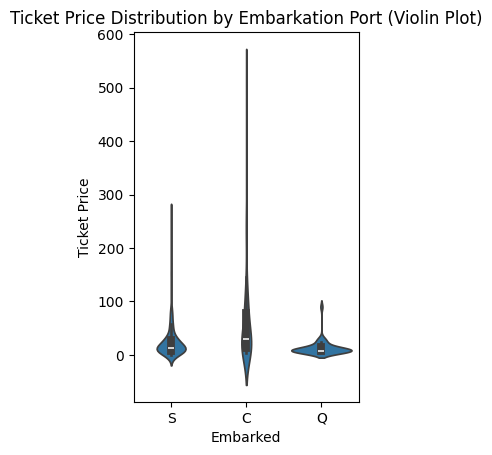

In [439]:
# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=dataset, x='Embarked', y='Fare')
plt.title('Ticket Price Distribution by Embarkation Port (Violin Plot)')
plt.xlabel('Embarked')
plt.ylabel('Ticket Price')
plt.show()

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

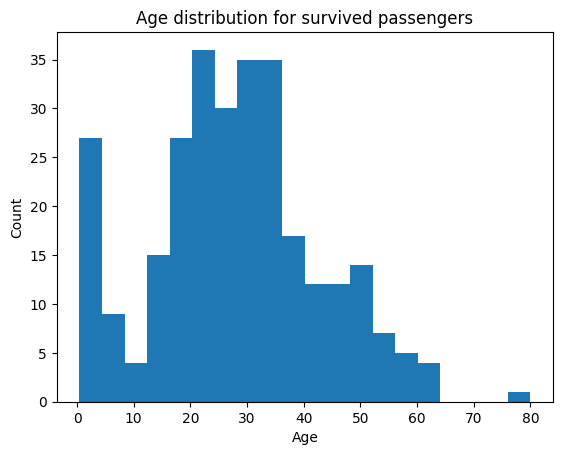

In [402]:
plt.hist(dataset[dataset['Survived'] == 1]['Age'], bins=20)
plt.title("Age distribution for survived passengers")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

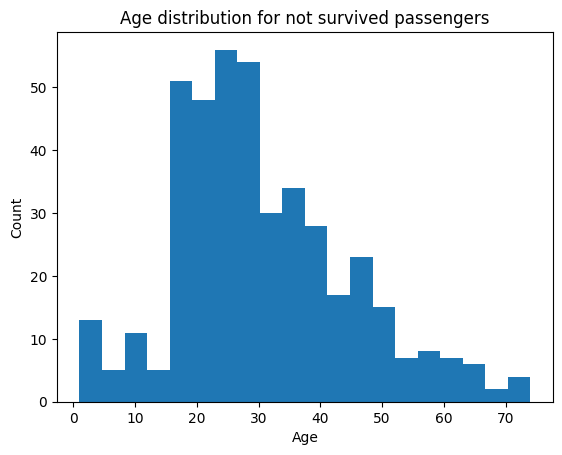

In [401]:
plt.hist(dataset[dataset['Survived'] == 0]['Age'], bins=20)
plt.title("Age distribution for not survived passengers")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [369]:
# The mean age for each class
dataset.groupby('Survived')['Age'].agg('mean')

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

**Значения не очень сильно отличаются, по графикам видно, что в основном умирали и выживали люди в диапазоне от ~16-30**

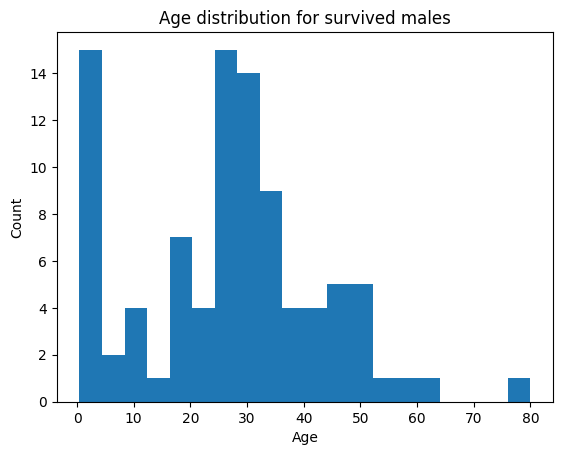

In [400]:
plt.hist(dataset[(dataset['Survived'] == 1) & (dataset['Sex'] == 'male')]['Age'], bins=20)
plt.title("Age distribution for survived males")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

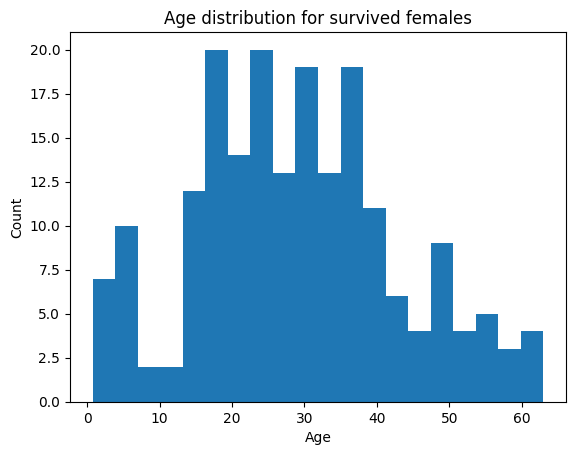

In [399]:
plt.hist(dataset[(dataset['Survived'] == 1) & (dataset['Sex'] == 'female')]['Age'], bins=20)
plt.title("Age distribution for survived females")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Conclusion**

На графиках можно увидеть, что выжило очень много детей около 1 года, в отличие от девочек того же возраста. Также высокие показатели у мужчин около 30 лет среди остального возраста у мужчин, остальные показатели намного ниже. У женщин больше всего частоты от 18 до 40 лет. 
Таким образом, сильных различий между средним возрастом умерших и выживших пассажиров не наблюдается (средний возраст ~30), по графикам видно, что очень много выжило младенцев (мальчиков), а также видно, что женщин выжило намного больше, чем мужчин, то есть первым приоритетом спасения были женщины и дети, и только потом мужчины.